In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [57]:
df = pd.read_csv('telco_customer_churn.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [60]:
df.dropna(how='any', inplace=True)

In [61]:
df.Churn.value_counts()/len(df)*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

In [62]:
x = df.drop(['customerID', 'Churn'], axis=1)
y = df.Churn.values

In [63]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [64]:
# Feature encoding
x = pd.get_dummies(x, columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True, dtype=int)

In [65]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [66]:
len(x_train)

5274

In [67]:
len(x_test)

1758

In [68]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
standard_scaling = StandardScaler()
x_train_scaling = standard_scaling.fit_transform(x_train)
x_test_scaling = standard_scaling.transform(x_test)

# KNN Classifiers

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [70]:
imputer = SimpleImputer(strategy='mean') # Handled NaN Values

In [71]:
x_train_scaling = imputer.fit_transform(x_train_scaling)

In [72]:
model = KNeighborsClassifier()

In [73]:
# Passing data to classifier
model.fit(x_train_scaling, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [74]:
x_test_scaling = imputer.fit_transform(x_test_scaling)

In [75]:
y_prediction = model.predict(x_test_scaling)

In [76]:
y_prediction

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
      shape=(1758,), dtype=object)

In [77]:
y_test

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
      shape=(1758,), dtype=object)

In [78]:
# Classification metric to check model's behaviour
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction)* 100)

75.36973833902162


In [79]:
data = [[0, 2, 87, 178, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]]

In [80]:
data_scaling = standard_scaling.transform(data)
single = model.predict(data_scaling)
print(single)

['Yes']


In [81]:
data_scaling = standard_scaling.transform(data)
single = model.predict_proba(data_scaling)
print(single)

[[0.2 0.8]]


# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=2)
# Passing data to classifier
decision_tree_model.fit(x_train_scaling, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [83]:
decision_tree_y_prediction = decision_tree_model.predict(x_test_scaling)

In [84]:
# Classification metric to check model's behaviour
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, decision_tree_y_prediction)* 100)

77.87258248009101


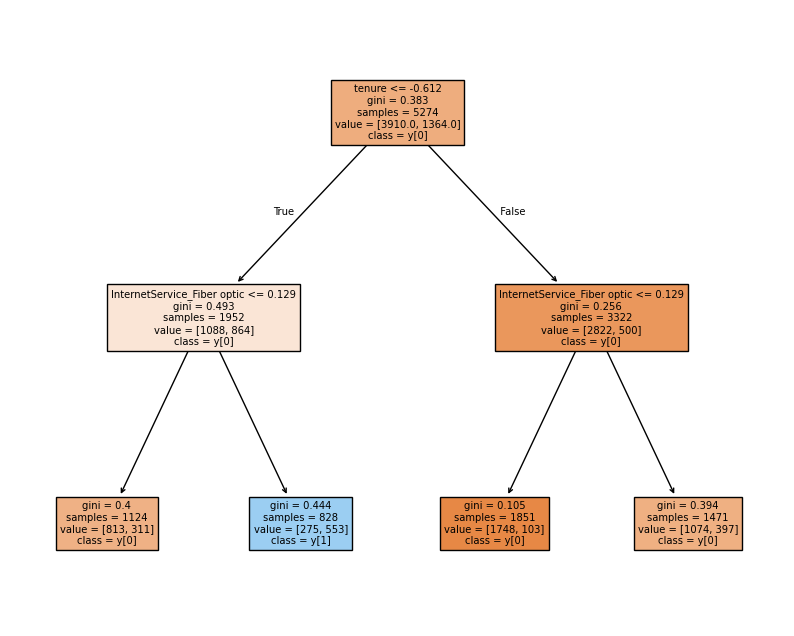

In [85]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(decision_tree_model, filled=True, feature_names=x_train.columns, class_names=True)
plt.show()

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=500)
# Passing data to classifier
random_forest_model.fit(x_train_scaling, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [87]:
random_forest_y_prediction = random_forest_model.predict(x_test_scaling)

In [88]:
# Classification metric to check model's behaviour
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, random_forest_y_prediction)* 100)

77.7019340159272


In [89]:
from sklearn.metrics import classification_report

In [90]:
knn_report = (classification_report(y_test, y_prediction))
decision_tree_report = (classification_report(y_test, decision_tree_y_prediction))
random_forest_report = (classification_report(y_test, random_forest_y_prediction))

In [91]:
print('KNN Report:', knn_report)

KNN Report:               precision    recall  f1-score   support

          No       0.81      0.85      0.83      1253
         Yes       0.58      0.52      0.55       505

    accuracy                           0.75      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.75      0.75      0.75      1758



In [92]:
print('Decision Tree Report:', decision_tree_report)

Decision Tree Report:               precision    recall  f1-score   support

          No       0.80      0.93      0.86      1253
         Yes       0.69      0.41      0.52       505

    accuracy                           0.78      1758
   macro avg       0.74      0.67      0.69      1758
weighted avg       0.77      0.78      0.76      1758



In [93]:
print('Random Forest Report:', random_forest_report)

Random Forest Report:               precision    recall  f1-score   support

          No       0.81      0.90      0.85      1253
         Yes       0.65      0.48      0.55       505

    accuracy                           0.78      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



# Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_model = BernoulliNB()
# Passing data to classifier
naive_bayes_model.fit(x_train_scaling, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [95]:
naive_bayes_y_prediction = naive_bayes_model.predict(x_test_scaling)

In [96]:
# Classification metric to check model's behaviour
print(accuracy_score(y_test, naive_bayes_y_prediction)* 100)

72.86689419795222


In [97]:
naive_bayes_report = (classification_report(y_test, naive_bayes_y_prediction))
print('Naive Bayes Report:', naive_bayes_report)

Naive Bayes Report:               precision    recall  f1-score   support

          No       0.90      0.70      0.79      1253
         Yes       0.52      0.81      0.63       505

    accuracy                           0.73      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.79      0.73      0.74      1758



# Support Vector Machine Classifier

In [98]:
from sklearn.svm import SVC
svm_model = SVC()
# Passing data to classifier
svm_model.fit(x_train_scaling, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [99]:
svm_y_prediction = svm_model.predict(x_test_scaling)

In [100]:
# Classification metric to check model's behaviour
print(accuracy_score(y_test, svm_y_prediction)* 100)

78.89647326507395


In [101]:
svm_report = (classification_report(y_test, svm_y_prediction))
print('Naive Bayes Report:', svm_report)

Naive Bayes Report:               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1253
         Yes       0.69      0.49      0.57       505

    accuracy                           0.79      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.78      0.79      0.78      1758



# Logistic Regression Classifier

In [102]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
# Passing data to classifier
logistic_regression_model.fit(x_train_scaling, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [103]:
logistic_regression_y_prediction = logistic_regression_model.predict(x_test_scaling)

In [104]:
# Classification metric to check model's behaviour
print(accuracy_score(y_test, logistic_regression_y_prediction)* 100)

79.18088737201366


In [105]:
logistic_regression_report = (classification_report(y_test, logistic_regression_y_prediction))
print('Naive Bayes Report:', logistic_regression_report)

Naive Bayes Report:               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1253
         Yes       0.67      0.55      0.60       505

    accuracy                           0.79      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.78      0.79      0.79      1758



# Ensemble Learning

In [106]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=200)
adaboost_model.fit(x_train_scaling, y_train)
adaboost_y_prediction = adaboost_model.predict(x_test_scaling)
print('Accuracy Score of Adaboost: ', accuracy_score(y_test, adaboost_y_prediction))

Accuracy Score of Adaboost:  0.7923777019340159


# Gradient Boosting Algorithm

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200)
gradient_boosting_model.fit(x_train_scaling, y_train)
gradient_boosting_y_prediction = gradient_boosting_model.predict(x_test_scaling)
print('Accuracy Score of Gradient Boosting: ', accuracy_score(y_test, gradient_boosting_y_prediction))

Accuracy Score of Gradient Boosting:  0.7815699658703071


# XG Boost Algorithm

In [111]:
# 1. encoding
y[y == 'No'] = 0
y[y == 'Yes'] = 1

y = y.astype('int') 

# 2. Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# 3. Scaling
from sklearn.preprocessing import StandardScaler
standard_scaling = StandardScaler()
x_train_scaling = standard_scaling.fit_transform(x_train)
x_test_scaling = standard_scaling.transform(x_test)

# 4. Training
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 

xg_boost_model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1)
xg_boost_model.fit(x_train_scaling, y_train)

# 5. Prediction & Evaluation
xg_boost_y_prediction = xg_boost_model.predict(x_test_scaling)
print('Accuracy Score of XG Boosting: ', accuracy_score(y_test, xg_boost_y_prediction))

Accuracy Score of XG Boosting:  0.8151308304891922
